In [55]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [11]:
df = pd.read_csv('/content/final_data_kw (2).csv')

In [51]:
df['Interests'][121]

'Machine Learning'

In [12]:
df.Interests = df.Interests.str.rstrip("\r")
df.Interests = df.Interests.str.rstrip("\n")
df.Interests = df.Interests.str.rstrip("\r\n")

In [13]:
df = df[:250]

In [14]:
df.head(2).T

,0,1
Title,Building an FPS Game with Unity,Big Data Applications: Machine Learning at Scale
Description,Create a high-quality first person shooter gam...,Machine learning is transforming the world aro...
Keywords,"UFPS,Create,Unity","learning,MIPT,Machine"
Interests,Others,Machine Learning


In [15]:
df.Interests.unique()

array(['Others', 'Machine Learning', 'Science', 'Web Dev',
       'CS Fundamentals', 'Artificial Intelligence', 'DSA', 'Technology',
       'App Dev', 'Ethics', 'Cryptography', 'Deep Learning', 'Business'],
      dtype=object)

In [16]:
df['category_id'] = df['Interests'].factorize()[0]
category_id_df = df[['Interests', 'category_id']].drop_duplicates()

In [17]:
df.head()

,Title,Description,Keywords,Interests,category_id
0,Building an FPS Game with Unity,Create a high-quality first person shooter gam...,"UFPS,Create,Unity",Others,0
1,Big Data Applications: Machine Learning at Scale,Machine learning is transforming the world aro...,"learning,MIPT,Machine",Machine Learning,1
2,KM3NeT sensitivity to low energy astrophysical...,"KM3NeT, a new generation of neutrino telescope...","neutrino,Sea,low-energy",Science,2
3,Dynamic Belief Fusion for Object Detection,A novel approach for the fusion of detection s...,"detection,fusion,detectors",Science,2
4,Mastering Immutable.js,This book shows JavaScript developers how to b...,"JavaScript,book,shows",Web Dev,3


In [18]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Interests']].values)

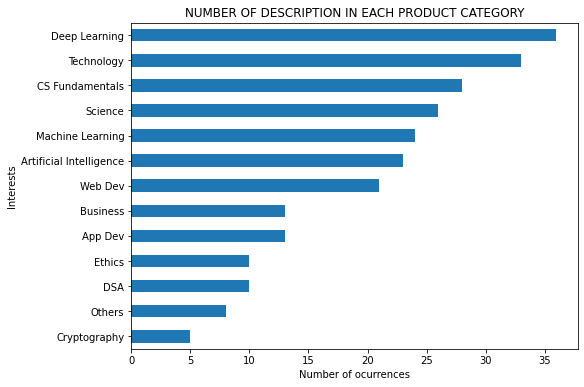

In [19]:
fig = plt.figure(figsize=(8,6))
df.groupby('Interests').Description.count().sort_values().plot.barh(
    ylim=0, title= 'NUMBER OF DESCRIPTION IN EACH PRODUCT CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [20]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df.Description).toarray()
labels = df.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 250 complaints is represented by 690 features (TF-IDF score of unigrams and bigrams)


In [22]:
N = 5
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  print("n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))

n==> App Dev:
  * Most Correlated Unigrams are: mobile, testing, create, development, java
n==> Artificial Intelligence:
  * Most Correlated Unigrams are: artificial, issue, pose, optimal, optimization
n==> Business:
  * Most Correlated Unigrams are: frameworks, course, areas, management, business
n==> CS Fundamentals:
  * Most Correlated Unigrams are: programming, computing, database, computer, python
n==> Cryptography:
  * Most Correlated Unigrams are: public, key, security, series, modern
n==> DSA:
  * Most Correlated Unigrams are: software, edition, written, classic, book
n==> Deep Learning:
  * Most Correlated Unigrams are: networks, propose, neural, segmentation, image
n==> Ethics:
  * Most Correlated Unigrams are: life, lectures, decision, organizations, ethical
n==> Machine Learning:
  * Most Correlated Unigrams are: conclude, big, learning, data, machine
n==> Others:
  * Most Correlated Unigrams are: recipes, reference, ways, analytics, teach
n==> Science:
  * Most Correlated 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [24]:
X = df['Description']
y = df['Interests']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [56]:
models = [
    RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42),
    LinearSVC(),
    XGBClassifier(),
    LGBMClassifier(),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]

In [57]:
CV = 5
cv_df = pd.DataFrame(index=range(CV*len(models)))

In [58]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name','fold_idx','accuracy'])

In [59]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LGBMClassifier,0.260,0.050990
LinearSVC,0.440,0.046904
LogisticRegression,0.396,0.057271
MultinomialNB,0.384,0.068411
RandomForestClassifier,0.348,0.064187
XGBClassifier,0.348,0.030332


In [31]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df['Interests'].unique()))

ttttCLASSIFICATIION METRICSn
                         precision    recall  f1-score   support

                 Others       0.00      0.00      0.00         2
       Machine Learning       0.25      0.25      0.25         4
                Science       0.57      0.67      0.62         6
                Web Dev       0.57      0.57      0.57         7
        CS Fundamentals       0.40      0.22      0.29         9
Artificial Intelligence       0.67      0.29      0.40         7
                    DSA       0.50      0.50      0.50         4
             Technology       0.50      0.56      0.53         9
                App Dev       0.17      1.00      0.29         1
                 Ethics       0.50      0.33      0.40         3
           Cryptography       0.00      0.00      0.00         2
          Deep Learning       0.60      0.86      0.71         7
               Business       0.33      0.50      0.40         2

               accuracy                           0.46     

From the above classification report, we can observe that the classes which have a greater number of occurrences tend to have a good f1-score compared to other classes.

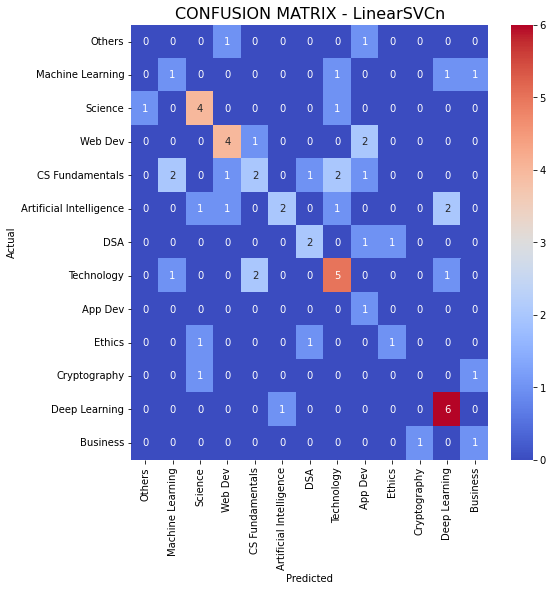

In [35]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm", fmt='d',
            xticklabels=category_id_df.Interests.values, 
            yticklabels=category_id_df.Interests.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [40]:
X_train = X_train.tolist()

In [38]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [41]:
fitted_vectorizer = tfidf.fit(X_train)

In [43]:
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [44]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [52]:
complaint = """
Accounting has always been about analytical thinking. From the earliest days of the profession, Luca Pacioli emphasized the importance of math and order for analyzing business transactions. The skillset that accountants have needed to perform math and to keep order has evolved from pencil and paper, to typewriters and calculators, then to spreadsheets and accounting software. A new skillset that is becoming more important for nearly every aspect of business is that of big data analytics: analyzing large amounts of data to find actionable insights. This course is designed to help accounting students develop an analytical mindset and prepare them to use data analytic programming languages like Python and R. We�ve divided the course into three main sections. In the first section, we bridge accountancy to analytics. We identify how tasks in the five major subdomains of accounting (i.e., financial, managerial, audit, tax, and systems) have historically required an analytical mindset, and we then explore how those tasks can be completed more effectively and efficiently by using big data analytics. We then present a FACT framework for guiding big data analytics: Frame a question, Assemble data, Calculate the data, and Tell others about the results. In the second section of the course, we emphasize the importance of assembling data. Using financial statement data, we explain desirable characteristics of both data and datasets that will lead to effective calculations and visualizations. In the third, and largest section of the course, we demonstrate and explore how Excel and Tableau can be used to analyze big data. We describe visual perception principles and then apply those principles to create effective visualizations. We then examine fundamental data analytic tools, such as regression, linear programming (using Excel Solver), and clustering in the context of point of sale data and loan data. We conclude by demonstrating the power of data analytic programming languages to assemble, visualize, and analyze data. We introduce Visual Basic for Applications as an example of a programming language, and the Visual Basic Editor as an example of an integrated development environment (IDE).
"""
print(model.predict(fitted_vectorizer.transform([complaint])))

['Machine Learning']
